In [ ]:
## IMPORT LIBRARY

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,MaxPooling2D,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.preprocessing import image 
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow 

In [ ]:
# Define the model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [ ]:
# Set up the data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/dataset/train',
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')



test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/dataset/test',
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')


Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=15,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

Epoch 1/15
28/28 [==============================] - 12s 449ms/step - loss: 0.6927 - accuracy: 0.4919 - val_loss: 0.6931 - val_accuracy: 0.5357
Epoch 2/15
28/28 [==============================] - 12s 426ms/step - loss: 0.6923 - accuracy: 0.5278 - val_loss: 0.6871 - val_accuracy: 0.5071
Epoch 3/15
28/28 [==============================] - 12s 424ms/step - loss: 0.6886 - accuracy: 0.5619 - val_loss: 0.7031 - val_accuracy: 0.4714
Epoch 4/15
28/28 [==============================] - 11s 396ms/step - loss: 0.6895 - accuracy: 0.5619 - val_loss: 0.6794 - val_accuracy: 0.5429
Epoch 5/15
28/28 [==============================] - 12s 424ms/step - loss: 0.6939 - accuracy: 0.4937 - val_loss: 0.6940 - val_accuracy: 0.5000
Epoch 6/15
28/28 [==============================] - 12s 417ms/step - loss: 0.6957 - accuracy: 0.4883 - val_loss: 0.6933 - val_accuracy: 0.5071
Epoch 7/15
28/28 [==============================] - 12s 416ms/step - loss: 0.6916 - accuracy: 0.5296 - val_loss: 0.6928 - val_accuracy: 0.5286

In [ ]:
import matplotlib.image as mpimg

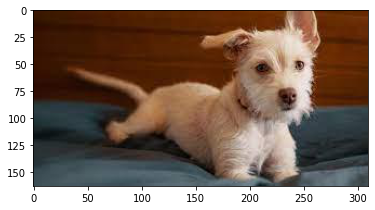

In [ ]:
# display dog image
img = mpimg.imread('/content/drive/MyDrive/dataset/train/dogs/dog_100.jpg')
imgplt = plt.imshow(img)
plt.show()

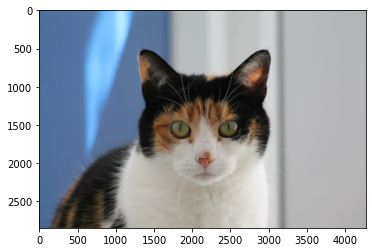

In [ ]:
# display cat image
img = mpimg.imread('/content/drive/MyDrive/dataset/train/cats/cat_123.jpg')
imgplt = plt.imshow(img)
plt.show()

In [ ]:
# Save the trained model as an h5 file
model.save('Cat_Dog_classifier.h5')


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the image and resize it to (150, 150)
test_image = image.load_img('/content/drive/MyDrive/dataset/test/cats/cat_114.jpg', target_size=(150, 150))

# Convert the image to a numpy array
test_image = image.img_to_array(test_image)

# Normalize the pixel values (scale them to be between 0 and 1)
test_image /= 255.

# Reshape the image to have batch size of 1
test_image = np.expand_dims(test_image, axis=0)

# Make a prediction using the model
result = model.predict(test_image)

# Check the prediction
if result[0][0] == 1:
    print('Dog')
else:
    print('Cat')


1/1 [==============================] - 0s 23ms/step
Cat
